<a href="https://colab.research.google.com/github/matesoft2033/students_habits_performance/blob/main/students_habits_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd # data frame ისთვის
import numpy as np # მათემატიკისთვის
import matplotlib.pyplot as plt # data - ს ვიზუალიზაციისთვის
import seaborn as sns # ესეც ვიზუალიზაციისთვის ოღონდ უკეთესი

In [67]:
data = pd.read_csv('/content/drive/MyDrive/Google Colab/Data Processing/student_habits_performance.csv')
data.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [68]:
# missing value ების პოვნა და დაჯამება <-- სამომავლოდ
data.isna().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [69]:
sns.set_style('whitegrid')

<ipython-input-70-1b7252571b12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x='age', palette = 'pastel')


<Axes: xlabel='age', ylabel='count'>

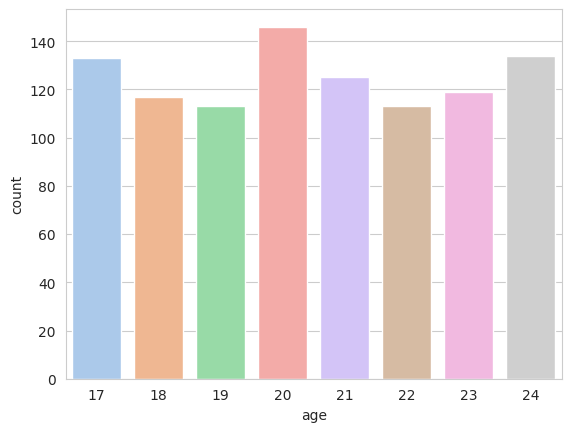

In [70]:
# გვაძლევს ინფორმაციას თითოეული ასაკის მოსწავლისა და უსაბამებს თუ სულ ეგეთი რამდენია
sns.countplot(data = data, x='age', palette = 'pastel')

<Axes: xlabel='age', ylabel='social_media_hours'>

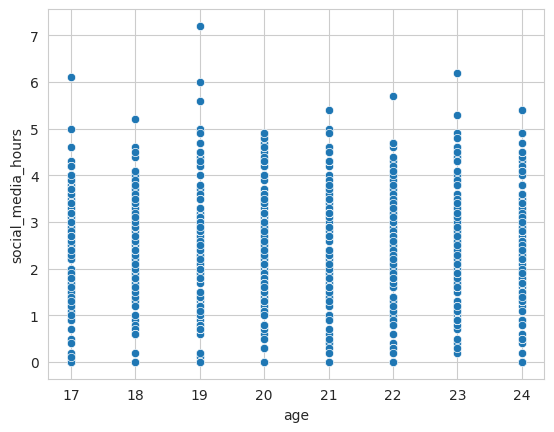

In [71]:
# თითოეული წერტილი ასახავს კონკრეტული ადამიანის ასაკსა და სოციალური მედიის საათებს.
sns.scatterplot(data=data, x='age', y='social_media_hours')

In [72]:
data.head(200)
if 'diet_quality' in data.columns:
    data['diet_quality_encoded'] = data['diet_quality'].map({'Poor': 0, 'Good': 1, 'Fair': 2}) # ერორებისთვის დამჭირდა if ები

if 'internet_quality' in data.columns:
    data['internet_quality_encoded'] = data['internet_quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})

if 'extracurricular_participation' in data.columns:
    data['extracurricular_participation_encoded'] = data['extracurricular_participation'].map({'No': 0, 'Yes': 1})

if 'gender' in data.columns:
    data['gender_encoded'] = data['gender'].map({'Female': 0, 'Male': 1})

if 'part_time_job' in data.columns:
    data['part_time_job_encoded'] = data['part_time_job'].map({'No': 0, 'Yes': 1})

In [92]:
# დიდად არ ახდენს გავლენას ჩვენს მიზანზე, ამიტომ დავდროპოთ ესენი
data.drop('parental_education_level', axis=1, inplace=True, errors="ignore") # დავაიგნორე თავიდან გაშვების გამო აწითლებდა
data.drop('student_id', axis=1, inplace = True, errors="ignore")
data.drop(['diet_quality', 'internet_quality', 'extracurricular_participation'], axis=1, inplace=True, errors='ignore')
data.drop(['gender'], axis=1, inplace=True, errors='ignore')
data.drop(['part_time_job'], axis=1, inplace=True, errors='ignore')

In [74]:
data

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,diet_quality_encoded,internet_quality_encoded,extracurricular_participation_encoded,gender_encoded,part_time_job_encoded
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,2,1,1,0.0,0
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,1,1,0,0.0,0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,1.0,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,1,0.0,0
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,2,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,2,2,1,0.0,0
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0,1,1,0.0,1
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,1,2,1,1.0,0
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,2,1,0,1.0,1


In [75]:
# რიცხვითი მონაცემების კორელაციის სითბოს რუკა
from sklearn.preprocessing import StandardScaler

num_cols = data.select_dtypes(include =['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)
scaled_df

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,diet_quality_encoded,internet_quality_encoded,extracurricular_participation_encoded,gender_encoded,part_time_job_encoded
0,1.084551,-2.418068,-1.114064,-0.669750,0.092426,1.248120,1.461166,0.900186,-0.793922,1.000902,-0.392302,1.464464,-0.995833,-0.523341
1,-0.215870,2.281707,0.251315,0.446965,1.401696,-1.525661,1.461166,0.900186,1.800846,-0.337202,-0.392302,-0.682844,-0.995833,-0.523341
2,0.217604,-1.464491,0.507324,-0.483631,1.135584,1.248120,-1.008689,-1.559339,-2.091307,-1.675307,-1.768800,-0.682844,1.004184,-0.523341
3,1.084551,-1.736942,1.190013,-0.762810,-1.397800,2.227102,0.473224,-1.559339,-2.535616,-1.675307,0.984196,1.464464,-0.995833,-0.523341
4,-0.649344,0.987566,1.616694,-1.228108,0.720450,-1.280916,-0.020747,-1.559339,-0.189661,1.000902,0.984196,-0.682844,-0.995833,-0.523341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.217604,-0.647139,-1.711417,-0.204452,-0.759132,0.840211,-0.514718,0.197465,0.384980,1.000902,0.984196,1.464464,-0.995833,-0.523341
996,-1.516291,-0.442801,-1.284736,0.540025,0.198871,0.269138,-1.008689,0.197465,-0.219282,-1.675307,-0.392302,1.464464,-0.995833,1.910802
997,-0.215870,-0.374688,0.080643,-0.483631,-2.366448,0.024393,0.967195,1.251547,-0.308144,-0.337202,0.984196,1.464464,1.004184,-0.523341
998,1.518025,1.260017,1.360685,-0.669750,1.689097,0.921793,-1.502660,-1.559339,0.005835,1.000902,-0.392302,-0.682844,1.004184,1.910802


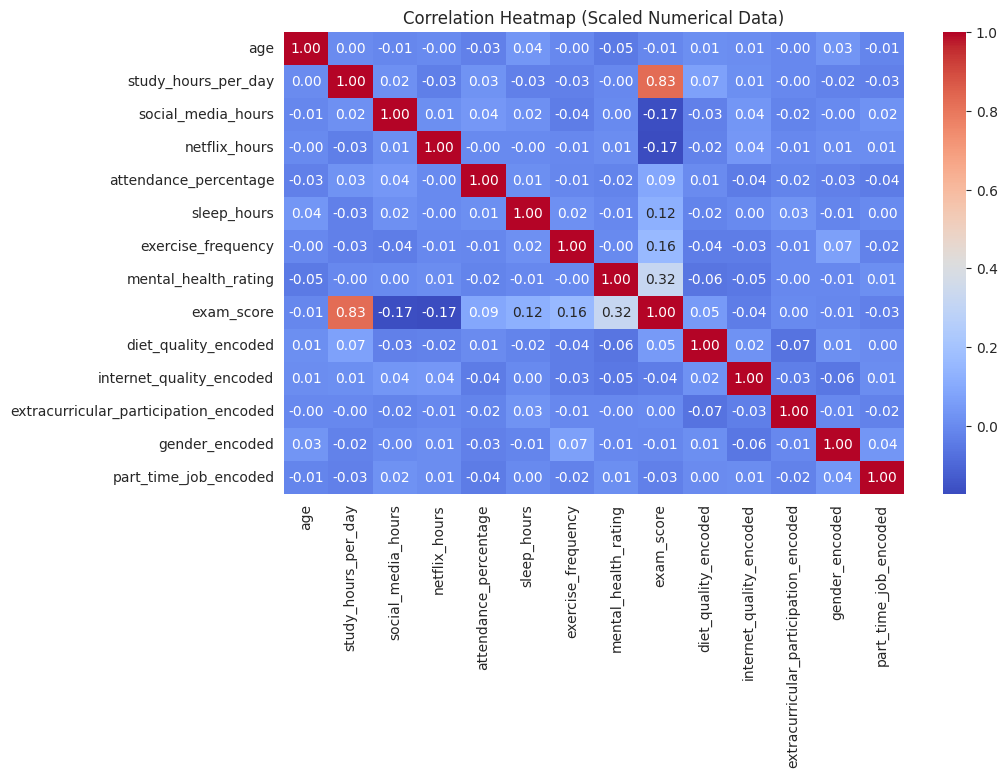

In [76]:
plt.figure(figsize =(10,6))
sns.heatmap(scaled_df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap (Scaled Numerical Data)')
plt.show()

In [77]:
data

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,diet_quality_encoded,internet_quality_encoded,extracurricular_participation_encoded,gender_encoded,part_time_job_encoded
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,2,1,1,0.0,0
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,1,1,0,0.0,0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,1.0,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,1,0.0,0
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,2,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,2,2,1,0.0,0
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,0,1,1,0.0,1
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,1,2,1,1.0,0
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,2,1,0,1.0,1


In [78]:
from sklearn.model_selection import train_test_split # split ისთვის საჭირო ბიბლიოთეკა

features = [
    "study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours",
    "exercise_frequency", "mental_health_rating", "part_time_job_encoded"
]
x = data[features] # <-- feature
y = data['exam_score'] # <-- label


In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # უშუალოდ დავყავი 80/20 ზე

In [80]:
x_train

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,part_time_job_encoded
29,2.0,3.2,3.8,82.6,6.7,6,10,1
535,6.4,4.2,1.5,88.8,6.1,0,6,1
695,2.5,1.9,1.6,93.6,7.0,4,8,0
557,3.8,3.6,4.3,100.0,7.3,1,7,0
836,3.5,2.8,0.0,92.0,3.8,5,5,0
...,...,...,...,...,...,...,...,...
106,3.3,0.4,0.8,83.3,9.1,6,4,0
270,4.0,3.2,2.3,96.6,6.0,4,3,1
860,3.6,3.9,4.2,100.0,8.3,1,8,0
435,2.0,0.0,3.1,73.7,6.3,6,3,0


In [81]:
y_train

,exam_score
29,75.7
535,85.0
695,68.5
557,69.9
836,58.7
...,...
106,82.3
270,63.0
860,65.6
435,58.3


In [82]:
from sklearn.ensemble import RandomForestRegressor # რეგრესიის მაგალითია, ამიტომ გამოვიყენეთ RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score # ავირჩიე 2 მეტრიკა

model = RandomForestRegressor(n_estimators=100, random_state=42) # 100 decision tree და seed 42, რათა უწყვეტად მოხდეს პროცესი და refresh ის დროს არ დაიკარგოს
model.fit(x_train, y_train) # უშუალოდ training
y_pred = model.predict(x_test) # ჩვენ მიერ შეყვანილ მონაცემებზე აკეთებს პროგნოზს

print("MAE:", mean_absolute_error(y_test, y_pred)) # აკეთებს საშუალო აბსოლუტურ განსხვავებას რეალურ მნიშვნელობებსა და პროგნოზებს შორის.
print("R²:", r2_score(y_test, y_pred)) # 0-1 ამდეა და გვიჩვენებს მოდელის სიზუსტეს. ამ შემთხვევაში 85% სიზუსტეს თუ პროცენტებში ვიტყვით


MAE: 4.829415000000001
R²: 0.8558281678183663


In [83]:
comparison = x_test.copy() # data - ს შესანახად
comparison['Predicted_Score'] = y_pred # ცხრილში დასამატებლად
comparison

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,part_time_job_encoded,Predicted_Score
521,3.5,2.1,1.4,82.2,7.7,1,3,0,67.039
737,5.9,4.6,2.6,100.0,6.6,0,1,1,86.660
740,4.5,2.4,1.2,86.8,6.5,3,4,1,77.781
660,3.3,2.2,1.4,89.1,5.9,2,9,0,73.116
411,1.6,0.8,3.2,63.0,8.0,3,10,1,57.005
...,...,...,...,...,...,...,...,...,...
408,1.2,3.5,2.0,81.7,6.5,4,1,0,41.108
332,2.7,1.9,2.3,71.6,7.7,3,8,0,69.687
208,2.8,1.2,2.2,94.1,7.2,3,10,1,69.483
613,3.8,0.6,1.0,98.3,7.2,3,9,0,83.572


In [84]:
comparison['y_true'] = y_test # ახალ column ს ვქმნით y_true და ვინახავთ y_test
comparison

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,part_time_job_encoded,Predicted_Score,y_true
521,3.5,2.1,1.4,82.2,7.7,1,3,0,67.039,64.2
737,5.9,4.6,2.6,100.0,6.6,0,1,1,86.660,72.7
740,4.5,2.4,1.2,86.8,6.5,3,4,1,77.781,79.0
660,3.3,2.2,1.4,89.1,5.9,2,9,0,73.116,79.5
411,1.6,0.8,3.2,63.0,8.0,3,10,1,57.005,58.2
...,...,...,...,...,...,...,...,...,...,...
408,1.2,3.5,2.0,81.7,6.5,4,1,0,41.108,34.3
332,2.7,1.9,2.3,71.6,7.7,3,8,0,69.687,71.2
208,2.8,1.2,2.2,94.1,7.2,3,10,1,69.483,75.8
613,3.8,0.6,1.0,98.3,7.2,3,9,0,83.572,85.7


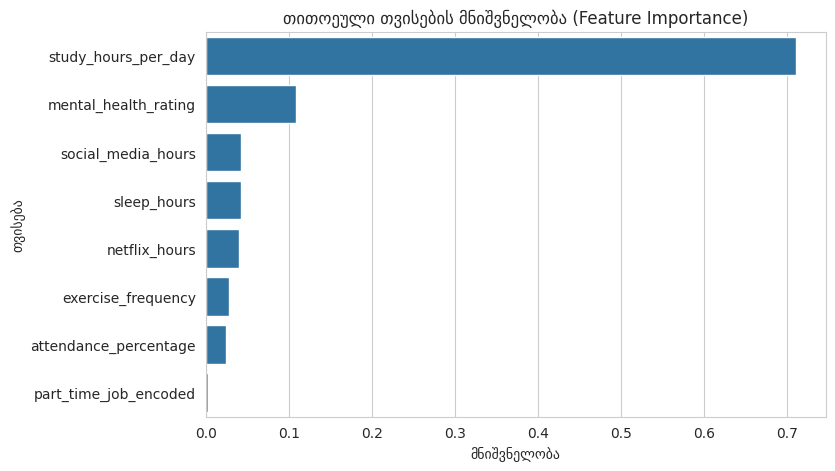

In [85]:
importances = model.feature_importances_
feature_names = x_train.columns

sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title("თითოეული თვისების მნიშვნელობა (Feature Importance)")
plt.xlabel("მნიშვნელობა")
plt.ylabel("თვისება")
plt.show()

In [94]:
# ინდივიდუალური პროგნოზის მაგალითი
sample_passenger = pd.DataFrame({
    "study_hours_per_day": [10],
    "social_media_hours": [6],
    "netflix_hours": [1],
    "attendance_percentage": [97],
    "sleep_hours": [7],
    "exercise_frequency": [2],
    "mental_health_rating": [3],
    "part_time_job_encoded": [0]
})

model.predict(sample_passenger)

array([93.078])